In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *
import scipy


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [12]:
recastData = pd.read_pickle('./pp2tt_formFactors_scan.pcl')

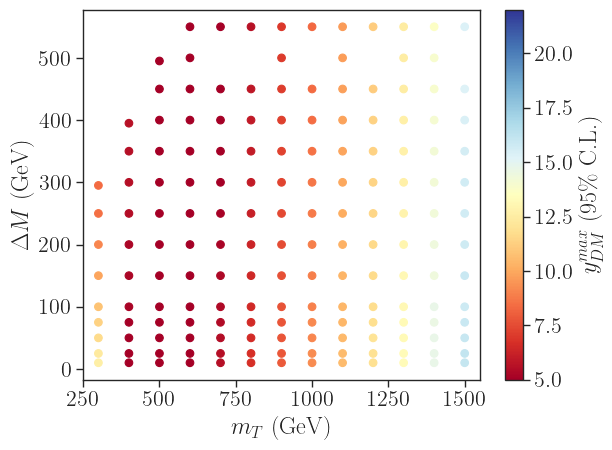

In [13]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

In [14]:
red = recastData[(recastData['mST'] == 500.) & (recastData['mChi'] == 400.)]
red.T

,28
model,Top-FormFactorsOneLoop-UFO
mST,500.0
mChi,400.0
mT,172.5
yDM,1.0
...,...
bin_836_2000,0.000002
bin_836_2000_Error,0.0
yDM (95% C.L.),4.027946
$\Delta \chi^2$ (95% C.L.),3.84


In [15]:
# ### Load ATLAS data
xsecsObs,sm,covMatrix = read_ATLASdata()
# ### Load LO background from MG5
smLO = getSMLO()
# Get k-factor for each bin
kfac = getKfactor(sm,smLO)

binCols = [c for c in red.columns 
               if 'bin_' in c.lower() and not 'error' in c.lower()]
bins_left = np.array([eval(c.split('_')[1]) for c in binCols])
bins_right = np.array([eval(c.split('_')[2]) for c in binCols])
signal = list(zip(bins_left,red.iloc[0][binCols].values))
signal = np.array(sorted(signal))[:,1]
signal = kfac*signal

signal = signal/bin_widths
sm_bin = sm/bin_widths

In [16]:
resDict = getUL(signal,sm_bin,xsecsObs,covMatrix,deltas=0.0)
c2min = resDict['chi2min']
print(resDict)

{'yDMmin': array([0.]), 'chi2min': 10.139227277087516, 'yDM95': 4.027945784203929, 'deltaChi95': 3.8399999999999963}


In [17]:
deltas = 0.0
c2 = chi2(4.03, signal, sm_bin, xsecsObs, covMatrix, deltas)
c2obs = chi2(1.00, signal, sm_bin, xsecsObs, covMatrix, deltas)
c2sm = chi2(0.00, signal, sm_bin, xsecsObs, covMatrix, deltas)
print(c2-c2min)
print(c2obs-c2min)
print(c2sm-c2min)

3.8442392206278075
0.21847476973482927
0.0


In [34]:
ydm = 1.00
c2 = chi2(ydm, signal, sm_bin, xsecsObs, covMatrix, deltas)
p_sb = 1.0-scipy.stats.chi2.cdf(c2-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
CLs = p_sb/(p_b)
# CLs = 0.05 should give the 95%C.L. exclusion
print('CLs = %1.3f' %CLs)
print('Exclusion = %1.2f%%' %((1-CLs)*1e2)) # This is the number quoted by Contur!

CLs = 0.640
Exclusion = 35.98%


In [35]:
ydm = 4.00
c2 = chi2(ydm, signal, sm_bin, xsecsObs, covMatrix, deltas)
p_sb = 1.0-scipy.stats.chi2.cdf(c2-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
CLs = p_sb/(p_b)
# CLs = 0.05 should give the 95%C.L. exclusion
print('CLs = %1.3f' %CLs)
print('Exclusion = %1.2f%%' %((1-CLs)*1e2)) # This is the number quoted by Contur!

CLs = 0.052
Exclusion = 94.82%


In [39]:
ydm = 0.1
c2 = chi2(ydm, signal, sm_bin, xsecsObs, covMatrix, deltas)
p_sb = 1.0-scipy.stats.chi2.cdf(c2-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
CLs = p_sb/(p_b)
# CLs = 0.05 should give the 95%C.L. exclusion
print('CLs = %1.3f' %CLs)
print('Exclusion = %1.2f%%' %((1-CLs)*1e2)) # This is the number quoted by Contur!

CLs = 0.963
Exclusion = 3.72%
